In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


trainpath = './traindf-2.csv'
traindf = pd.read_csv(trainpath, delimiter=",")

testpath = './testdf-2.csv'
testdf = pd.read_csv(testpath, delimiter=",")

In [2]:
y = traindf["Survived"]

X = traindf.drop(['Survived'], axis=1)
X_test = testdf

model = RandomForestClassifier(n_estimators=200, min_samples_leaf=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': testdf.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

Your submission was successfully saved!


### Feature importance

In [3]:
fi = model.feature_importances_

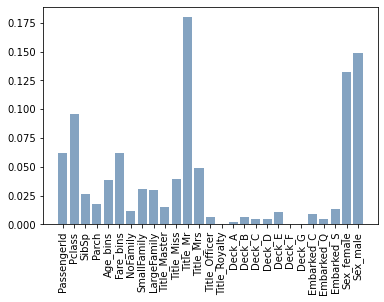

In [4]:
y_bar = np.arange(len(X.columns))
_ = plt.xticks(y_bar, X.columns, rotation=90)
_ = plt.bar(y_bar, fi, color=(0.2, 0.4, 0.6, 0.6))
plt.show()